Script to read in the SBML v2 models and save as comets 

In [1]:
import cobra
import sys
import copy
import numpy as np
import pandas as pd
import cometspy as c
import os

os.environ['COMETS_HOME'] = '/projectnb2/talbot-lab-data/zrwerbin/interactions/comets_2.10.5_linux'
os.environ['JAVA_HOME'] = '/share/pkg.7/java/12.0.1/install'
os.environ['PATH'] = '/projectnb2/talbot-lab-data/zrwerbin/venvs/comets/bin:/share/pkg.7/gurobi/9.1.1/install/bin:/share/pkg.7/python3/3.8.10/install/bin:/share/pkg.7/java/12.0.1/install/bin:/projectnb/talbot-lab-data/zrwerbin/temporal_forecast/data_construction/microbe/16S_copy_num_normalize/copy_num_normalize:/usr/java/default/jre/bin:/usr/java/default/bin:/usr/lib64/qt-3.3/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin:/opt/dell/srvadmin/bin:/bin:/projectnb2/talbot-lab-data/zrwerbin/interactions/comets_2.10.5_linux'

In [2]:
model_dir = "/projectnb2/talbot-lab-data/metabolic_models/curated_models/" # model location

NEU_c = c.model()
NET_c = c.model()
NMU_c = c.model()
NOC_c = c.model()
NDE_c = c.model()
NWI_c = c.model()
NHA_c = c.model()
NSP_c = c.model()
iJO_c = c.model()
iRR_c = c.model()
iJN_c = c.model()
iPB_c = c.model()
iAF9_c = c.model()
iAF6_c = c.model()
Nitro_c = c.model()

NDE_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_defluvii_NOB.cmd')
NSP_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_gracilis_NOB.cmd')
NMU_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_multiformis_AOB.cmd')
NET_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_eutropha_AOB.cmd')
NEU_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_europaea_AOB.cmd')
NOC_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_oceani_AOB.cmd')
NWI_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_winogradskyi_NOB.cmd')
NHA_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_N_hamburgensis_NOB.cmd')

iJO_c.read_comets_model(model_dir   + '/N_cycle/comets/not_metanet_iJO1366.cmd')
iRR_c.read_comets_model(model_dir   + '/N_cycle/comets/not_metanet_iRR1083.cmd')
iJN_c.read_comets_model(model_dir   + '/N_cycle/comets/not_metanet_iJN746.cmd')
iPB_c.read_comets_model(model_dir   + '/N_cycle/comets/not_metanet_iPB890.cmd')
iAF9_c.read_comets_model(model_dir  + '/N_cycle/comets/not_metanet_iAF987.cmd')
iAF6_c.read_comets_model(model_dir  + '/N_cycle/comets/not_metanet_iAF692.cmd')
Nitro_c.read_comets_model(model_dir + '/N_cycle/comets/not_metanet_Nitrospira_NOB.cmd')

In [3]:
from cometspy.utils import grow_rocks, pick_random_locations

grid_width =  20 # narrow, so we can really look at stratification
grid_height =  60

grid_width =  10 # narrow, so we can really look at stratification
grid_height =  40
n_rocks = 30 # 70
rock_locs = grow_rocks(n = n_rocks, xrange = [1,grid_width-1],yrange = [1,grid_height-1],mean_size = 2)

Each species will have biomass seeded at 60 different locations. First we make a copy of the rock_locs so we don't accidentally alter it, and call this copy forbidden_locs. Next we pick the random locations for each species. One big list of locations is created, then species each get a portion of that list.

In [4]:
import copy
forbidden_locs = copy.deepcopy(rock_locs)

founders_per_species = 50 # 60
founders_per_species = 15 # 60
n_species = 15
init_locs = pick_random_locations(n = founders_per_species*n_species, 
                                   xrange = [1,grid_width], yrange = [1,grid_height], 
                                   forbidden_locs = forbidden_locs)

spec1_locs = init_locs[1:founders_per_species]
spec2_locs = init_locs[founders_per_species + 1:founders_per_species*2]
spec3_locs = init_locs[founders_per_species*2 + 1:founders_per_species*3]
spec4_locs = init_locs[founders_per_species*3 + 1:founders_per_species*4]
spec5_locs = init_locs[founders_per_species*4 + 1:founders_per_species*5]
spec6_locs = init_locs[founders_per_species*5 + 1:founders_per_species*6]
spec7_locs = init_locs[founders_per_species*6 + 1:founders_per_species*7]
spec8_locs = init_locs[founders_per_species*7 + 1:founders_per_species*8]
spec9_locs = init_locs[founders_per_species*8 + 1:founders_per_species*9]
spec10_locs = init_locs[founders_per_species*9 + 1:founders_per_species*10]
spec11_locs = init_locs[founders_per_species*10 + 1:founders_per_species*11]
spec12_locs = init_locs[founders_per_species*11 + 1:founders_per_species*12]
spec13_locs = init_locs[founders_per_species*12 + 1:founders_per_species*13]
spec14_locs = init_locs[founders_per_species*13 + 1:founders_per_species*14]
spec15_locs = init_locs[founders_per_species*14 + 1:founders_per_species*15]

In [5]:
# We set the initial population for each species by using a python list comprehension.

NEU_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec1_locs]
NET_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec2_locs]
NMU_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec3_locs]
NOC_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec4_locs]
NDE_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec5_locs]
NWI_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec6_locs]
NHA_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec7_locs]
NSP_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec8_locs]
iAF9_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec9_locs]
iAF6_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec10_locs]
iRR_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec11_locs]
iJO_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec12_locs]
iPB_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec13_locs]
iJN_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec14_locs]
Nitro_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec15_locs]


If we wish to take a look at what locations were chosen, we can easily make an image with matplotlib:

In [6]:
# Km values from supplement Sihi et al 

# Half-sat constant of NO3 for N20 production

#Neuro_c.change_km('EX_nh4_e', 36.5) # Ammonium (NH4) exchange reaction 
#Neuro_c.change_km('EX_cpd00007_e', 12.75) # O2 exchange reaction
#Neuro_c.change_km('EX_cpd00011_e', 3.8) ## CO2 exchange reaction 
#Neuro_c.change_km('EX_cpd00418_e', 12.75) # NO, same as O2 exchange reaction
#
#Nwino_c.change_km('EX_cpd00075_e', 0.464)  # Nitrite (NO2) exchange reaction 
#Nwino_c.change_km('EX_cpd00007_e', 51.8) # O2 exchange reaction
#Nwino_c.change_km('EX_cpd00011_e', 0.37) # CO2 exchange reaction 
#Nwino_c.change_km('EX_cpd00418_e', 51.8) # NO, same as O2 exchange reaction

#Neuro_c.change_vmax('R_Ammonuium_Conversion', 36.5) # Ammonium (NH4) exchange reaction 
#Neuro_c.change_vmax('EX_cpd00007_e', 12.75) # O2 exchange reaction
#Neuro_c.change_vmax('EX_cpd00011_e', 3.8) ## CO2 exchange reaction 
#
#Nwino_c.change_vmax('EX_cpd00075_e', 0.464)  # Nitrite (NO2) exchange reaction 
#Nwino_c.change_vmax('EX_cpd00007_e', 51.8) # O2 exchange reaction
#Nwino_c.change_vmax('EX_cpd00011_e', 0.37) # CO2 exchange reaction 

#Neuro_c.change_vmax('EX_cpd00013_e',1000) 
#Neuro_c.change_vmax('EX_cpd00007_e',1000) 
#Neuro_c.change_vmax('EX_cpd00011_e',1000)

Add models to the layout.

We are now done prepping the models and the layout. Next we setup the simulation parameters. Note the positive death rate.


In [7]:
# Read in file with parameters
observed_params = pd.read_csv("/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/simulation_categories.csv")
observed_params


,Unnamed: 0,moisture,diffusion,ammonium,nitrate,oxygen,co2,id,rownames
0,1,0.22,3.18,0.74,0.00,0.144,0,sim_diff_3.18_nh4_0.74_no3_0_mois_0.22_o2_0.144,1
1,2,0.24,3.18,0.55,0.00,0.150,0,sim_diff_3.18_nh4_0.55_no3_0_mois_0.24_o2_0.15,2
2,3,0.55,3.18,3.20,0.00,0.013,0,sim_diff_3.18_nh4_3.2_no3_0_mois_0.55_o2_0.013,3
3,4,0.51,3.18,2.00,1.76,0.126,0,sim_diff_3.18_nh4_2_no3_1.76_mois_0.51_o2_0.126,4
4,5,0.43,3.18,2.61,0.02,0.007,0,sim_diff_3.18_nh4_2.61_no3_0.02_mois_0.43_o2_0...,5
...,...,...,...,...,...,...,...,...,...
120,121,0.53,2.11,3.46,0.00,0.003,0,sim_diff_2.11_nh4_3.46_no3_0_mois_0.53_o2_0.003,121
121,122,0.46,2.11,3.59,10.64,0.105,0,sim_diff_2.11_nh4_3.59_no3_10.64_mois_0.46_o2_...,122
122,123,0.46,2.11,3.01,2.28,0.111,0,sim_diff_2.11_nh4_3.01_no3_2.28_mois_0.46_o2_0...,123
123,124,0.34,2.11,1.64,0.05,0.103,0,sim_diff_2.11_nh4_1.64_no3_0.05_mois_0.34_o2_0...,124


In [8]:
os.chdir('/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/')

In [ ]:
sim_list = [21,22,23,24,25,26,27,28,29,30]
sim_list = range(33, 41)

#sim_list = range[2,120]
#sim_list = [21,22,23,24,25,26,27,28,29,30]

#sim_list =  range(44, 125)
#sim_list =  range(1, 2)

sim_list =  range(70, 125)

for i in sim_list:
    print(i)
    specific_scenario = observed_params[observed_params["rownames"] == i]
    
    print(specific_scenario)
    
    diff_constant = specific_scenario.iloc[0]["diffusion"] * .00001
    ammon_conc = specific_scenario.iloc[0]["ammonium"] 
    nitrate_conc = specific_scenario.iloc[0]["nitrate"] 
    h2o = specific_scenario.iloc[0]["moisture"] 
    o2 = specific_scenario.iloc[0]["oxygen"] 
    co2 = specific_scenario.iloc[0]["co2"] 
    
    
    #print(diff_constant)
    #print(ammon_conc)
    #print([diff_constant, ammon_conc, nitrate_conc, h2o])
    
    # Create output path from parameters
    output_dir = (specific_scenario.iloc[0]["id"] + '/')
    print(output_dir)
    
    output_path = os.path.join("/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/simulation_output/unlimited/" + output_dir)
    os.makedirs(output_path, exist_ok = True)
    
    #print(output_path)
    
    # Modify layout according to parameters
    #specific_layout = copy.deepcopy(layout)
    params = c.params()
    params.set_param('timeStep', 2) # in hours
    params.set_param('spaceWidth', .1) # one cell = one cm3
    params.set_param('maxCycles', 200)
    params.set_param('maxSpaceBiomass', 10) # gDW # max biomass allowed per cell
    params.set_param('deathRate', 0.0001) # die at rate of 1/10000 per hour
    params.set_param('defaultKm', 0.0001)
    params.set_param('BiomassLogRate', 150)
    params.set_param('totalBiomassLogRate', 25)
    params.set_param('MediaLogRate', 25)
    params.set_param("FluxLogRate", 150)    
    params.set_param('numRunThreads', 28)
    params.set_param("writeMediaLog", True)
    params.set_param("writeBiomassLog", True)
    #params.set_param("writeSpecificMediaLog", True)
    params.set_param("writeFluxLog", True)
    #params.set_param("specificMediaLogRate", 25) # time steps
    #params.set_param("specificMedia", "nh4_e,no3_e,no2_e,no3_e,no2_e,n2o_e,h2o_e,o2_e,h_e,co2_e,ch4_e") # metabolites to track
    
    
    specific_layout = c.layout()
    specific_layout.grid = [grid_width,grid_height]
    specific_layout.add_barriers(rock_locs)
    model_list = [NEU_c,NET_c,NMU_c, NOC_c, NDE_c,NWI_c,NHA_c,NSP_c,iAF9_c,iAF6_c,iRR_c,iJO_c,iPB_c,iJN_c,Nitro_c]
    
    for mod in model_list:
        specific_layout.add_model(mod)
     
    all_mets = specific_layout.media.metabolite    
    
    for met in all_mets:
        if met in set(specific_layout.media['metabolite']):
            specific_layout.set_specific_metabolite(met,1000)
    
     #specific_layout.add_model(iJN_c)
        
    specific_layout.set_metabolite_diffusion(diff_constant)
    
    #trace_metabolites = ['ca2_e','cl_e','cobalt2_e',
    #                     'cu2_e','fe2_e','fe3_e','co2_e',
    #                     'h_e','k_e','mg2_e','mn2_e','mobd_e',
    #                     'na1_e','ni2_e','so3_e','hco3_e','nac_e',
    #                     'pi_e','so4_e','zn2_e']
    #
    #for met in trace_metabolites:
    #    if met in set(specific_layout.media['metabolite']):
    #        specific_layout.set_specific_static(met,1000)
    #
    ##specific_layout.set_specific_metabolite('cys__L_e',.0001)
    #specific_layout.set_specific_metabolite('nac_e',.0001)
    #specific_layout.set_specific_metabolite('4abz_e',0.0001)
    #specific_layout.set_specific_metabolite('nac_e',0.0001)
    
    # Keep a constant refresh of soil monosaccharides
    
    #specific_layout.set_specific_refresh('glc__D_e',.00001)
    #specific_layout.set_specific_refresh('gal_e',.00001)
    
    
    # Add organic acids
    #specific_layout.set_specific_metabolite('meoh_e',0.0001)
    #specific_layout.set_specific_metabolite('cit_e',0.0001)
    #specific_layout.set_specific_metabolite('succ_e',0.0001)
    #specific_layout.set_specific_metabolite('o2_e',o2)
    specific_layout.set_specific_metabolite('o2_e',o2)
    
    
    
    #specific_layout.set_specific_metabolite('cys__L_e',1)
    #specific_layout.set_specific_metabolite('nac_e',1)
    #specific_layout.set_specific_metabolite('4abz_e',1)
    #specific_layout.set_specific_metabolite('glc__D_e',0.0001)
    
    
    #specific_layout.set_specific_static('cys__L_e',.0001)
    #specific_layout.set_specific_static('glc__D_e',.0001)
    #specific_layout.set_specific_static('meoh_e',0.0001)
    #specific_layout.set_specific_static('cit_e',0.0001)
    #specific_layout.set_specific_static('succ_e',0.0001)
        
    #specific_layout.read_comets_layout(input_obj='/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/.current_layout')
    
    # Match these values to soil sample
    specific_layout.set_specific_metabolite('nh4_e', ammon_conc)
    specific_layout.set_specific_metabolite('h2o_e', h2o)
    specific_layout.set_specific_metabolite('no3_e', nitrate_conc)
    specific_layout.set_specific_metabolite('no2_e', nitrate_conc)
    #specific_layout.set_specific_metabolite('o2_e', o2)
    #specific_layout.set_specific_static('o2_e', o2)
    #specific_layout.set_specific_static('co2_e', 1000)
    
    specific_layout.set_specific_metabolite('n2o_e', 0.0001)
    specific_layout.set_specific_metabolite('no_e', 0.0001)
    
    specific_layout.set_specific_refresh('co2_e',500)
    
    #for x in range(grid_width):
    #    specific_layout.set_specific_static_at_location('o2_e', (x,0), o2) # top
    #    specific_layout.set_specific_static_at_location('o2_e', (x,grid_height-1), 0.) # bottom: zero, sink for o2
    #    specific_layout.set_specific_static_at_location('co2_e', (x,grid_height-1), 0.) # bottom: zero, sink for co2

    specific_layout.media   =  specific_layout.media.reset_index(drop=True)
    
    sim = c.comets(specific_layout, params)
    sim.run(delete_files=True)
    #sim.run(delete_files=False)
    
    sim.biomass.to_csv(output_path + 'biomass.csv')
    sim.total_biomass.to_csv(output_path + 'total_biomass.csv')
    sim.media.to_csv(output_path + 'media.csv')
    sim.fluxes.to_csv(output_path + 'flux.csv')
    

70
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
69          70      0.28       3.18      0.45      0.0   0.113    0   

                                                 id  rownames  
69  sim_diff_3.18_nh4_0.45_no3_0_mois_0.28_o2_0.113        70  
sim_diff_3.18_nh4_0.45_no3_0_mois_0.28_o2_0.113/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!
71
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
70          71      0.28       3.18      1.29      0.0   0.133    0   

                                                 id  rownames  
70  sim_diff_3.18_nh4_1.29_no3_0_mois_0.28_o2_0.133        71  
sim_diff_3.18_nh4_1.29_no3_0_mois_0.28_o2_0.133/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running CO

84
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
83          84      0.37       2.11     12.67     5.56   0.108    0   

                                                   id  rownames  
83  sim_diff_2.11_nh4_12.67_no3_5.56_mois_0.37_o2_...        84  
sim_diff_2.11_nh4_12.67_no3_5.56_mois_0.37_o2_0.108/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!
85
    Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
84          85      0.39       2.11      6.84     1.34   0.111    0   

                                                   id  rownames  
84  sim_diff_2.11_nh4_6.84_no3_1.34_mois_0.39_o2_0...        85  
sim_diff_2.11_nh4_6.84_no3_1.34_mois_0.39_o2_0.111/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffus

In [9]:
i = 1
print(i)
specific_scenario = observed_params[observed_params["rownames"] == i]

print(specific_scenario)

diff_constant = specific_scenario.iloc[0]["diffusion"] * .00001
ammon_conc = specific_scenario.iloc[0]["ammonium"] 
nitrate_conc = specific_scenario.iloc[0]["nitrate"] 
h2o = specific_scenario.iloc[0]["moisture"] 
o2 = specific_scenario.iloc[0]["oxygen"] 
co2 = specific_scenario.iloc[0]["co2"] 


#print(diff_constant)
#print(ammon_conc)
#print([diff_constant, ammon_conc, nitrate_conc, h2o])

# Create output path from parameters
output_dir = (specific_scenario.iloc[0]["id"] + '/')
print(output_dir)

output_path = os.path.join("/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/simulation_output/unlimited/" + output_dir)
os.makedirs(output_path, exist_ok = True)

#print(output_path)

# Modify layout according to parameters
#specific_layout = copy.deepcopy(layout)
params = c.params()
params.set_param('timeStep', 1) # in hours
params.set_param('spaceWidth', .1) # one cell = one cm3
params.set_param('maxCycles', 300)
params.set_param('maxSpaceBiomass', 10) # gDW # max biomass allowed per cell
params.set_param('deathRate', 0.0001) # die at rate of 1/10000 per hour
params.set_param('defaultKm', 0.0001)
params.set_param('BiomassLogRate', 150)
params.set_param('totalBiomassLogRate', 25)
params.set_param('MediaLogRate', 25)
params.set_param("FluxLogRate", 150)    
params.set_param('numRunThreads', 28)
params.set_param("writeMediaLog", True)
params.set_param("writeBiomassLog", True)
params.set_param("writeSpecificMediaLog", True)
params.set_param("specificMediaLogRate", 25) # time steps
params.set_param("specificMedia", "nh4_e,no3_e,no2_e,no3_e,no2_e,n2o_e,h2o_e,o2_e,h_e,co2_e,ch4_e") # metabolites to track


specific_layout = c.layout()
specific_layout.grid = [grid_width,grid_height]
specific_layout.add_barriers(rock_locs)
model_list = [NEU_c,NET_c,NMU_c, NOC_c, NDE_c,NWI_c,NHA_c,NSP_c,iAF9_c,iAF6_c,iRR_c,iJO_c,iPB_c,iJN_c,Nitro_c]
 
for mod in model_list:
    specific_layout.add_model(mod)
     
all_mets = specific_layout.media.metabolite    

for met in all_mets:
    if met in set(specific_layout.media['metabolite']):
        specific_layout.set_specific_metabolite(met,1000)

 #specific_layout.add_model(iJN_c)
    
specific_layout.set_metabolite_diffusion(diff_constant)

#trace_metabolites = ['ca2_e','cl_e','cobalt2_e',
#                     'cu2_e','fe2_e','fe3_e','co2_e',
#                     'h_e','k_e','mg2_e','mn2_e','mobd_e',
#                     'na1_e','ni2_e','so3_e','hco3_e','nac_e',
#                     'pi_e','so4_e','zn2_e']
#
#for met in trace_metabolites:
#    if met in set(specific_layout.media['metabolite']):
#        specific_layout.set_specific_static(met,1000)
#
##specific_layout.set_specific_metabolite('cys__L_e',.0001)
#specific_layout.set_specific_metabolite('nac_e',.0001)
#specific_layout.set_specific_metabolite('4abz_e',0.0001)
#specific_layout.set_specific_metabolite('nac_e',0.0001)

# Keep a constant refresh of soil monosaccharides

#specific_layout.set_specific_refresh('glc__D_e',.00001)
#specific_layout.set_specific_refresh('gal_e',.00001)


# Add organic acids
#specific_layout.set_specific_metabolite('meoh_e',0.0001)
#specific_layout.set_specific_metabolite('cit_e',0.0001)
#specific_layout.set_specific_metabolite('succ_e',0.0001)
#specific_layout.set_specific_metabolite('o2_e',o2)
specific_layout.set_specific_metabolite('o2_e',o2)



#specific_layout.set_specific_metabolite('cys__L_e',1)
#specific_layout.set_specific_metabolite('nac_e',1)
#specific_layout.set_specific_metabolite('4abz_e',1)
#specific_layout.set_specific_metabolite('glc__D_e',0.0001)


#specific_layout.set_specific_static('cys__L_e',.0001)
#specific_layout.set_specific_static('glc__D_e',.0001)
#specific_layout.set_specific_static('meoh_e',0.0001)
#specific_layout.set_specific_static('cit_e',0.0001)
#specific_layout.set_specific_static('succ_e',0.0001)
    
#specific_layout.read_comets_layout(input_obj='/projectnb2/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/.current_layout')

# Match these values to soil sample
specific_layout.set_specific_metabolite('nh4_e', ammon_conc)
specific_layout.set_specific_metabolite('h2o_e', h2o)
specific_layout.set_specific_metabolite('no3_e', nitrate_conc)
specific_layout.set_specific_metabolite('no2_e', nitrate_conc)
#specific_layout.set_specific_metabolite('o2_e', o2)
#specific_layout.set_specific_static('o2_e', o2)
#specific_layout.set_specific_static('co2_e', 1000)

specific_layout.set_specific_metabolite('n2o_e', 0.0001)
specific_layout.set_specific_metabolite('no_e', 0.0001)

specific_layout.set_specific_refresh('co2_e',500)

#for x in range(grid_width):
#    specific_layout.set_specific_static_at_location('o2_e', (x,0), o2) # top
#    specific_layout.set_specific_static_at_location('o2_e', (x,grid_height-1), 0.) # bottom: zero, sink for o2
#    specific_layout.set_specific_static_at_location('co2_e', (x,grid_height-1), 0.) # bottom: zero, sink for co2

specific_layout.media   =  specific_layout.media.reset_index(drop=True)
sim = c.comets(specific_layout, params)
sim.run(delete_files=True)
##sim.run(delete_files=False)
#
#sim.biomass.to_csv(output_path + 'biomass.csv')
#sim.total_biomass.to_csv(output_path + 'total_biomass.csv')
#sim.media.to_csv(output_path + 'media.csv')

1
   Unnamed: 0  moisture  diffusion  ammonium  nitrate  oxygen  co2  \
0           1      0.22       3.18      0.74      0.0   0.144    0   

                                                id  rownames  
0  sim_diff_3.18_nh4_0.74_no3_0_mois_0.22_o2_0.144         1  
sim_diff_3.18_nh4_0.74_no3_0_mois_0.22_o2_0.144/
building empty layout model
models will need to be added with layout.add_model()
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...
Done!


In [83]:
#sim_specific.specific_media
#sim_specific.get_biomass_image(layout.models[0].id, 400)
df = sim.get_metabolite_time_series()
#df.to_csv(output_path + 'media.csv')

#df = sim.get_species_exchange_fluxes
#df.to_csv(output_path + 'fluxes.csv')

#sim.media
df

metabolite,cycle,4abz_e,5mtr_e,ac_e,ch4_e,ch4s_e,cu_e,h2o_e,h2s_e,h_e,n2o_e,nac_e,nh2oh_e,nh4_e,no_e,pheme_e
0,0,400.0,0.000,0.000000,0.000000,0.000000,0.04,0.04,0.000000,0.04,0.040,400.0,0.04,296.000000,0.040,0.04
1,25,340.0,123.264,0.000028,0.000011,0.000034,0.04,0.04,0.000011,0.04,0.034,340.0,0.04,251.600213,0.034,0.04
2,50,340.0,245.664,0.000053,0.000021,0.000064,0.04,0.04,0.000021,0.04,0.034,340.0,0.04,251.600410,0.034,0.04
3,75,340.0,368.064,0.000077,0.000031,0.000092,0.04,0.04,0.000031,0.04,0.034,340.0,0.04,251.600591,0.034,0.04
4,100,340.0,490.464,0.000098,0.000039,0.000118,0.04,0.04,0.000039,0.04,0.034,340.0,0.04,251.600758,0.034,0.04
5,125,340.0,612.864,0.000117,0.000047,0.000141,0.04,0.04,0.000047,0.04,0.034,340.0,0.04,251.600913,0.034,0.04
6,150,340.0,735.264,0.000135,0.000054,0.000162,0.04,0.04,0.000054,0.04,0.034,340.0,0.04,251.601056,0.034,0.04
7,175,340.0,857.664,0.000151,0.000061,0.000182,0.04,0.04,0.000060,0.04,0.034,340.0,0.04,251.601188,0.034,0.04
8,200,340.0,980.064,0.000166,0.000067,0.000200,0.04,0.04,0.000066,0.04,0.034,340.0,0.04,251.601310,0.034,0.04
9,225,340.0,1102.464,0.000180,0.000072,0.000216,0.04,0.04,0.000072,0.04,0.034,340.0,0.04,251.601424,0.034,0.04


In [50]:
sim.run_output

"-script\nrunning script file: /projectnb/talbot-lab-data/metabolic_models/scripts/N_cycle_sim/data/.current_script_0x2b6969f82fd0\nCurrent Java version: 12.0.1\nParameters file .current_global_0x2b6969f82fd0 loaded.\nParameters file .current_package_0x2b6969f82fd0 loaded.\nLoading layout file '.current_layout_0x2b6969f82fd0'...\nnull/COMETS_manifest.txt (No such file or directory)\nUnable to initialize manifest file. \nContinuing without writing manifest file.\nFound 15 model files!\nLoading './not_metanet_N_europaea_AOB.cmd' ...\nDone!\n Testing default parameters...\nDone!\nOptimizer status code = 5 (looks ok!)\nobjective solution = 0.11\nLoading './not_metanet_N_eutropha_AOB.cmd' ...\nDone!\n Testing default parameters...\nDone!\nOptimizer status code = 5 (looks ok!)\nobjective solution = 0.11\nLoading './not_metanet_N_multiformis_AOB.cmd' ...\nDone!\n Testing default parameters...\nDone!\nOptimizer status code = 5 (looks ok!)\nobjective solution = 0.058\nLoading './not_metanet_N_o

In [33]:
#df = sim.get_species_exchange_fluxes("not_metanet_iAF987") #produces (30)
#df = sim.get_species_exchange_fluxes("not_metanet_iAF692") # consumes nh4
#df = sim.get_species_exchange_fluxes("not_metanet_iRR1083") # consumes nh4
#df = sim.get_species_exchange_fluxes("not_metanet_iJO1366") # produces (840)
#df = sim.get_species_exchange_fluxes("not_metanet_iPB890") # consumes nh4
#df = sim.get_species_exchange_fluxes("not_metanet_iJN746") # consumes nh4


#df.to_csv(output_path + 'fluxes.csv')

df.EX_nh4_e



0    29.746508
Name: EX_nh4_e, dtype: float64

In [86]:
print(specific_layout.media.to_string())


       diff_c g_refresh g_static g_static_val init_amount         metabolite
0    0.000032         0        0            0           0          biomass_e
1    0.000032       500        1         1000           0              co2_e
2    0.000032         0        0            0        0.22              h2o_e
3    0.000032         0        1         1000           0                h_e
4    0.000032         0        0            0           0               n2_e
5    0.000032         0        0            0      0.0001              n2o_e
6    0.000032         0        0            0           0            nh2oh_e
7    0.000032         0        0            0        0.74              nh4_e
8    0.000032         0        0            0         0.0              no2_e
9    0.000032         0        0            0         0.0              no3_e
10   0.000032         0        0            0      0.0001               no_e
11   0.000032         0        0            0       0.144               o2_e

In [84]:
df = sim.get_species_exchange_fluxes('not_metanet_N_defluvii_NOB')
df

sim.fluxes


AttributeError: 'comets' object has no attribute 'fluxes_by_species'

,cycle,not_metanet_N_europaea_AOB,not_metanet_N_eutropha_AOB,not_metanet_N_multiformis_AOB,not_metanet_N_oceani_AOB,not_metanet_N_defluvii_NOB,not_metanet_N_winogradskyi_NOB,not_metanet_N_hamburgensis_NOB,not_metanet_N_gracilis_NOB,not_metanet_iAF987,not_metanet_iAF692,not_metanet_iRR1083,not_metanet_iJO1366,not_metanet_iPB890,not_metanet_iJN746,not_metanet_Nitrospira_NOB
0,0,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07,1.400000e-07
1,25,1.353964e-06,1.354196e-06,4.580518e-07,4.579353e-07,1.777953e-07,5.917085e-07,2.980253e-07,2.151740e-07,1.273350e-07,1.278174e-07,1.283144e-07,1.290828e-07,1.285657e-07,3.722424e-07,1.283481e-07
2,50,1.831040e-05,1.830903e-05,1.864885e-06,1.864670e-06,3.142953e-07,3.190588e-06,7.467301e-07,3.555745e-07,1.158612e-07,1.167244e-07,1.176393e-07,1.190988e-07,1.181077e-07,1.572946e-06,1.177635e-07
3,75,2.481672e-04,2.481488e-04,7.591535e-06,7.590649e-06,6.130629e-07,1.723832e-05,1.880513e-06,6.244276e-07,1.054633e-07,1.066212e-07,1.078844e-07,1.099640e-07,1.085389e-07,3.256694e-06,1.081425e-07
4,100,1.201175e-03,1.226591e-03,3.098572e-05,3.099658e-05,1.202300e-06,9.108930e-05,4.740457e-06,1.092656e-06,9.603756e-08,9.741737e-08,9.896807e-08,1.016024e-07,9.978059e-08,4.590205e-06,9.939195e-08


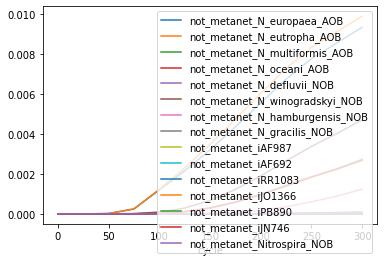

In [87]:
ax1 = sim.total_biomass.plot(x = 'cycle')
sim.total_biomass.head()

In [32]:
#sim.total_biomass['N_winogradskyi_NOB'].plot(x = 'cycle')
#sim.total_biomass['iJN746'].plot(x = 'cycle')
sim.total_biomass['iRR1083'].plot(x = 'cycle')
#sim.total_biomass['N_europaea_AOB'].plot(x = 'cycle')

KeyError: 'iRR1083'

<AxesSubplot:xlabel='cycle'>

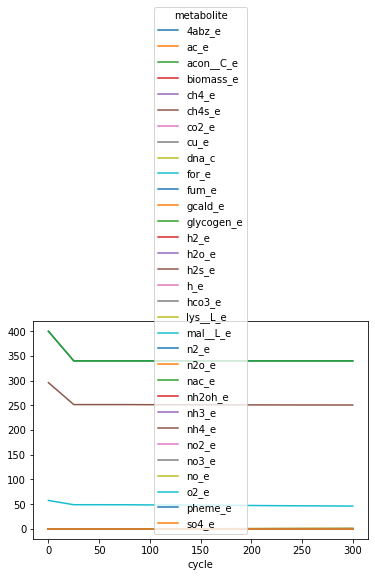

In [88]:
import matplotlib as plt
media = sim.get_metabolite_time_series(upper_threshold = 900)
media.plot(x = "cycle")


<AxesSubplot:xlabel='cycle'>

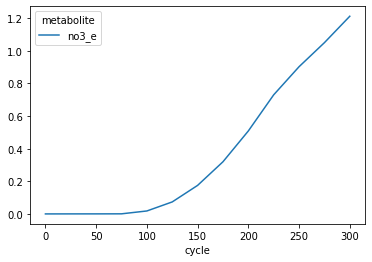

In [89]:

total_media = sim.media.groupby(by = ["metabolite", "cycle"]).agg(func = sum).reset_index().drop(columns = ["x", "y"])
total_media = total_media.pivot(columns = "metabolite", values = "conc_mmol", index = ["cycle"]).reset_index().fillna(0.)
total_media.head()

#total_media[['nh4_e','no2_e','no3_e','cycle']].plot(x = "cycle")
#total_media[['no2_e','no3_e','cycle']].plot(x = "cycle")
total_media[['no3_e','cycle']].plot(x = "cycle")

<AxesSubplot:xlabel='cycle'>

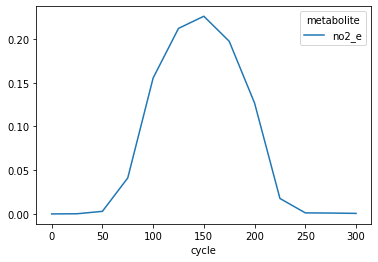

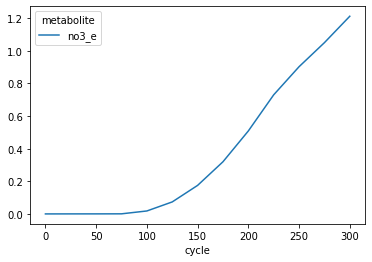

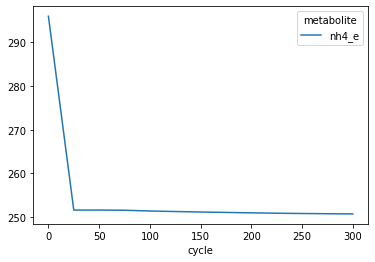

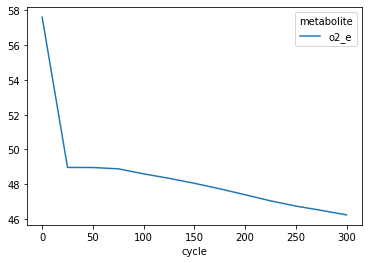

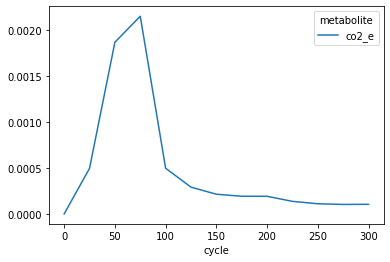

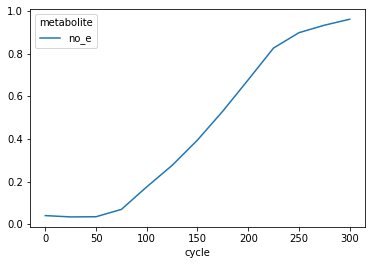

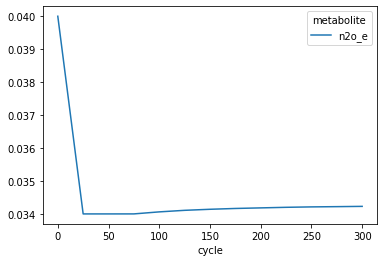

In [90]:
upper_threshold = 9

total_media = sim.media.groupby(by = ["metabolite", "cycle"]).agg(func = sum).reset_index().drop(columns = ["x", "y"])
total_media = total_media.pivot(columns = "metabolite", values = "conc_mmol", index = ["cycle"]).reset_index().fillna(0.)
total_media.head()

#total_media[['nh4_e','no2_e','no3_e','cycle']].plot(x = "cycle")
#total_media[['no2_e','no3_e','cycle']].plot(x = "cycle")
total_media[['no2_e','cycle']].plot(x = "cycle")
total_media[['no3_e','cycle']].plot(x = "cycle")
total_media[['nh4_e','cycle']].plot(x = "cycle")
total_media[['o2_e','cycle']].plot(x = "cycle")
total_media[['co2_e','cycle']].plot(x = "cycle")
#total_media[['glc__D_e','cycle']].plot(x = "cycle")
#total_media[['gam_e','cycle']].plot(x = "cycle")
#total_media[['pyr_e','cycle']].plot(x = "cycle")
#total_media[['ac_e','cycle']].plot(x = "cycle")
#total_media[['man_e','cycle']].plot(x = "cycle")
total_media[['no_e','cycle']].plot(x = "cycle")
total_media[['n2o_e','cycle']].plot(x = "cycle")

In [ ]:

#im4 = sim_diff_06_nh4_10.get_biomass_image('iYO844', params.all_params['maxCycles'])
im5 = sim_diff_06_nh4_10.get_biomass_image('N_europaea_AOB', params.all_params['maxCycles'])
#im6 = sim_diff_06_nh4_10.get_biomass_image('N_winogradskyi_NOB', params.all_params['maxCycles'])

final2 = np.zeros((grid_height,grid_width,3))
#final2[:,:,0] = im4 / np.max(im4)
#final2[:,:,1] = im5 / np.max(im5)
#final2[:,:,2] = im6 / np.max(im6)
#final2[:,:,0] = np.transpose(im4 / np.max(im4))
final2[:,:,1] = np.transpose(im5 / np.max(im5))
#final2[:,:,2] = np.transpose(im6 / np.max(im6))
for rock in rock_locs:
    final2[rock[1]-1,rock[0]-1,0:3] = 0.5 
    
from matplotlib import pyplot as plt
plt.figure(figsize = (60,10))
plt.imshow(final2)

Below here, we show a handful of metabolites. 

In [ ]:
figure, axis = plt.subplots(3, 4,figsize=(10,20))

## INITIAL

axis[0,0].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("nh4_e",0)))
axis[0,0].set_title("nh4")

axis[0,1].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("o2_e",0)))
axis[0,1].set_title("o2")

axis[0,2].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("co2_e",0)))
axis[0,2].set_title("co2")

#axis[0,3].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("succ_e",0)))
#axis[0,3].set_title("succ_e")


## MIDPOINT

axis[1,0].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("nh4_e",100)))
axis[1,0].set_title("nh4")

axis[1,1].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("o2_e",100)))
axis[1,1].set_title("o2")

axis[1,2].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("co2_e",100)))
axis[1,2].set_title("co2")

#axis[1,3].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("succ_e",100)))
#axis[1,3].set_title("succ_e")


## FINAL

axis[2,0].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("nh4_e",params.all_params['maxCycles'])))
axis[2,0].set_title("nh4")

axis[2,1].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("o2_e",params.all_params['maxCycles'])))
axis[2,1].set_title("o2")

axis[2,2].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("co2_e",params.all_params['maxCycles'])))
axis[2,2].set_title("co2")

#axis[2,3].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("succ_e",params.all_params['maxCycles'])))
#axis[2,3].set_title("succ_e")
plt.tight_layout()
#plt.show()